In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from pandas.plotting import table
from sklearn.preprocessing import LabelEncoder
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
from scipy import stats
# import researchpy as rp
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\KIIT_Intern\jupyter hand-on\housing.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
main_test=pd.read_csv(r"C:\Users\KIIT_Intern\jupyter hand-on\housing_test.csv")

In [5]:
MainTestCopy=main_test.copy()

In [6]:
df['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [7]:
main_test['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall'], dtype=object)

In [8]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [9]:
main_test['Exterior1st'].unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'CemntBd',
       'WdShing', 'BrkFace', 'AsbShng', 'BrkComm', 'Stucco', 'AsphShn',
       nan, 'CBlock'], dtype=object)

In [10]:
main_test['Exterior1st'].isnull().sum()

1

In [11]:
df['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [12]:
main_test['HouseStyle'].unique()

array(['1Story', '2Story', 'SLvl', '1.5Fin', 'SFoyer', '2.5Unf', '1.5Unf'],
      dtype=object)

In [13]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [14]:
main_test['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [15]:
main_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [16]:
# df.isnull().sum()

In [17]:
df.shape

(1460, 81)

# Defining a function to remove columns having null values in more than 80% of the rows

In [18]:
def removeDenseNullCols(df):
    d=df.isnull().mean().to_dict()
    droplist = [col for col, mean in d.items() if mean > 0.8]
    print("Dropping",droplist)
    df.drop(droplist,axis=1,inplace=True)
    
removeDenseNullCols(df)

Dropping ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [19]:
removeDenseNullCols(main_test)

Dropping ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [20]:
d=df.isnull().mean().to_dict()
[col for col, mean in d.items() if mean > 0]

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [21]:
d1=main_test.isnull().mean().to_dict()
[col for col, mean in d.items() if mean > 0]

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

First lets impute the missing values for the below nominal or numerical columns

In [22]:
df[['LotFrontage','MasVnrType','MasVnrArea','Electrical','GarageType','GarageYrBlt']].isnull().sum()

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageType      81
GarageYrBlt     81
dtype: int64

In [23]:
df['Electrical'].fillna(df['Electrical'].mode(), inplace=True)

In [24]:
main_test['Electrical'].fillna(main_test['Electrical'].mode(), inplace=True)
main_test['SaleType'].fillna(main_test['SaleType'].mode(), inplace=True)
main_test['Exterior1st'].fillna(main_test['Exterior1st'].mode(), inplace=True)

In [25]:
df['MasVnrType'].fillna("None", inplace=True)

In [26]:
main_test['MasVnrType'].fillna("None", inplace=True)

In [27]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [28]:
main_test['MasVnrArea'].fillna(main_test['MasVnrArea'].mean(), inplace=True)

In [29]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [30]:
df['GarageType'].fillna("No Garage", inplace=True)

In [31]:
main_test['GarageType'].fillna("No Garage", inplace=True)

In [32]:
main_test.shape

(1459, 76)

In [33]:
# stop

In [34]:
# MainTestCopy=main_test.copy()

Removing outliers

I get this intuition that the ones with no garage will be having missing values for garage-year-built. Lets see whether our intuition turns into assumption or not

In [35]:
d = df.groupby('GarageType')['GarageYrBlt'].apply(list).to_dict()
for k, v in d.items():
    if k == 'No Garage':
        print(v)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


 So our intuition turned into assumption so i will fill the nan for garage-year-built with 0

In [36]:
df['GarageYrBlt'].fillna(0, inplace=True)

In [37]:
main_test['GarageYrBlt'].fillna(0, inplace=True)

In [38]:
#impute lotfrontage by median of neighborhood
lot_frontage_by_neighborhood = df['LotFrontage'].groupby(df['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (df['Neighborhood'] == key) & (df['LotFrontage'].isnull())
                df.loc[idx, 'LotFrontage'] = group.median()

In [39]:
#impute lotfrontage by median of neighborhood
lot_frontage_by_neighborhood = main_test['LotFrontage'].groupby(main_test['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (main_test['Neighborhood'] == key) & (main_test['LotFrontage'].isnull())
                main_test.loc[idx, 'LotFrontage'] = group.median()

 first i thought to replace this na with no basement, no garage, no fireplace as per data dictionary but then later i am encoding these ordinal columns so i will encode na as 0. So i commented out this part below

In [40]:
# df['BsmtQual'].fillna("No Basement", inplace=True)
# df['BsmtCond'].fillna("No Basement", inplace=True)
# df['BsmtExposure'].fillna("No Basement", inplace=True)
# df['BsmtFinType1'].fillna("No Basement", inplace=True)
# df['BsmtFinType2'].fillna("No Basement", inplace=True)
# df['FireplaceQu'].fillna("No Fireplace", inplace=True)
# df['GarageType'].fillna("No Garage", inplace=True)
# df['GarageFinish'].fillna("No Garage", inplace=True)
# df['GarageQual'].fillna("No Garage", inplace=True)
# df['GarageCond'].fillna("No Garage", inplace=True)

In [41]:
# df_cor=df.loc[:,['SalePrice','OverallQual','OverallCond','YearBuilt','ExterCond','TotalBsmtSF','HeatingQC', 'CentralAir','GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','OpenPorchSF','PoolArea', 'YrSold']]

In [42]:
# def get_top_abs_correlations(df, n=5):
#     au_corr = df.corr().abs().unstack()
#     return au_corr[0:n]

# print("Top Absolute Correlations")
# # print(get_top_abs_correlations(df_cor, 11))

In [43]:
object_vars = list(df.select_dtypes(include=object).columns)

In [44]:
# # for var in object_vars:
#     print(var, ' has ', len(df[var].unique()), ' categories')

 Lets start with columns having 2 categories.
 We shall encode them into 0 or 1

In [45]:
for var in object_vars:
    if(len(df[var].unique())==2):
         print(var, ' has ', len(df[var].unique()), ' categories')

Street  has  2  categories
Utilities  has  2  categories
CentralAir  has  2  categories


In [46]:
num=LabelEncoder()
df['Street']=num.fit_transform(df['Street'].astype('str'))
df['Utilities']=num.fit_transform(df['Utilities'].astype('str'))
df['CentralAir']=num.fit_transform(df['CentralAir'].astype('str'))
main_test['Street']=num.fit_transform(main_test['Street'].astype('str'))
main_test['Utilities']=num.fit_transform(main_test['Utilities'].astype('str'))
main_test['CentralAir']=num.fit_transform(main_test['CentralAir'].astype('str'))

In [47]:
main_test.shape

(1459, 76)

In [48]:
df['CentralAir'].unique()

array([1, 0], dtype=int64)

 Now lets deal with columns with categories more than 7

In [49]:
for var in object_vars:
    if(len(df[var].unique())>7):
         print(var, ' has ', len(df[var].unique()), ' categories')

Neighborhood  has  25  categories
Condition1  has  9  categories
Condition2  has  8  categories
HouseStyle  has  8  categories
RoofMatl  has  8  categories
Exterior1st  has  15  categories
Exterior2nd  has  16  categories
SaleType  has  9  categories


 Lets start with neighbourhood as it has 25 categories. I would have created dummy variables but if i put same bars with equal height on the basis of saleprice then i wil get fewer categories and need not increase the number of columns

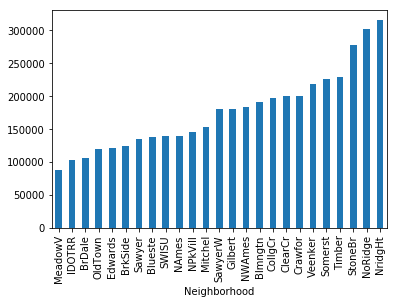

In [50]:
df['SalePrice'].groupby(df['Neighborhood']).median().sort_values().plot(kind='bar')

 Lets divide them into categories as per height in relation to SalePrice
GROUP-1
MeadowV
GROUP-2
IDOTRR,BrDale,OldTown,Edwards,BrkSide,Sawyer,Blueste
GROUP-3
SWISU,NAmes,NPkVill,Mitchel,SawyerW,Gilbert,NWAmes,Blmngtn,CollgCr
GROUP-4
ClearCr,Crawfor,Veenker,Somerst,Timber
GROUP-5
StoneBr,NoRidge,NridgHt

In [51]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, "Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}
df['Neighborhood'] = df['Neighborhood'].map(neighborhood_map)
main_test['Neighborhood'] = main_test['Neighborhood'].map(neighborhood_map)

In [52]:
main_test.shape

(1459, 76)

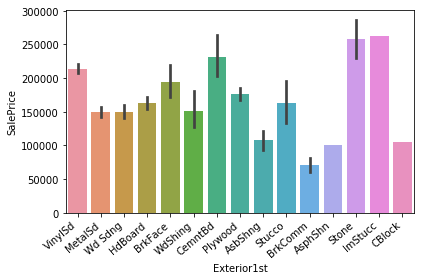

In [53]:
ap=sns.barplot(x='Exterior1st',y='SalePrice', data=df)
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

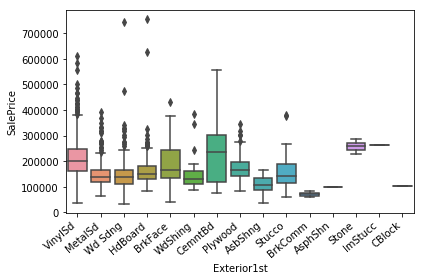

In [54]:
ap=sns.boxplot(x='Exterior1st',y='SalePrice', data=df)
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [55]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [56]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

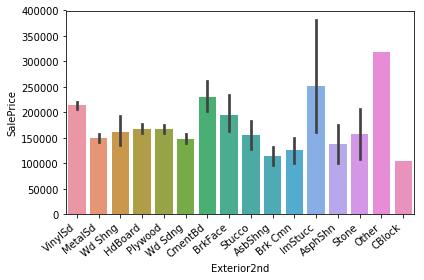

In [57]:
ap=sns.barplot(x='Exterior2nd',y='SalePrice', data=df)
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

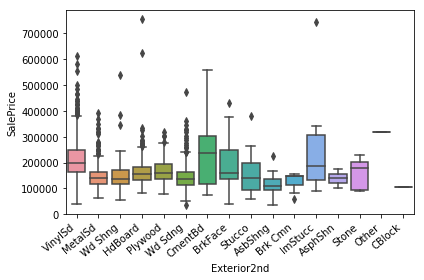

In [58]:
ap=sns.boxplot(x='Exterior2nd',y='SalePrice', data=df)
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

 These two features have almost same correlation towards the saleprice. So i will create dummy features. I will drop Exterior2nd

In [59]:
main_test.shape

(1459, 76)

In [60]:
dummy_ext=pd.get_dummies(df['Exterior1st'])
dummy_ext1=pd.get_dummies(main_test['Exterior1st'])

In [61]:
main_test.shape

(1459, 76)

In [62]:
df=pd.concat([df,dummy_ext],axis=1)
main_test=pd.concat([main_test,dummy_ext1],axis=1)

In [63]:
main_test.shape

(1459, 89)

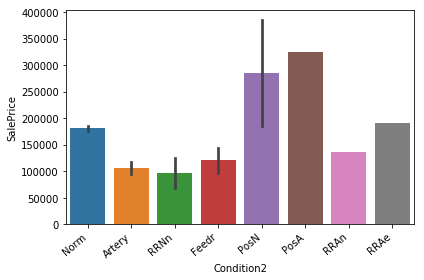

In [64]:
ap=sns.barplot(x='Condition2',y='SalePrice', data=df)
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [65]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [66]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

 Condition1 has more variance than condition2. Lets group the similar classes of condition 1 and get dummy features and drop condtion 2.

In [67]:
CondMap={"Norm":"Norm","Feedr":"StreetCond","Artery":"StreetCond","RRAn":"Rail","Pos":"Pos","RRAe":"Rail","PosA":"Pos","RRNn":"Rail","RRNe":"Rail"}
df['Condition1']=df['Condition1'].map(CondMap)
main_test['Condition1']=main_test['Condition1'].map(CondMap)

In [68]:
main_test.shape

(1459, 89)

In [69]:
dummy_cond=pd.get_dummies(df['Condition1'])
df=pd.concat([df,dummy_cond],axis=1)
dummy_cond1=pd.get_dummies(main_test['Condition1'])
main_test=pd.concat([main_test,dummy_cond1],axis=1)

In [70]:
main_test.shape

(1459, 93)

 We shall check f statistic if needed and create dummy features if needed for some nominal variables.

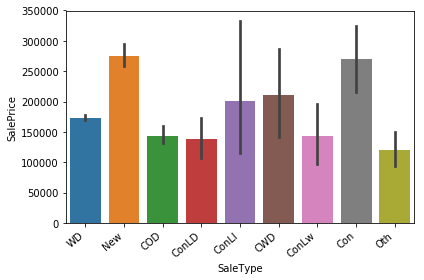

In [71]:
ap=sns.barplot(x='SaleType',y='SalePrice', data=df)
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [72]:
dummy_Sale=pd.get_dummies(df['SaleType'])
df=pd.concat([df,dummy_Sale],axis=1)
dummy_Sale1=pd.get_dummies(main_test['SaleType'])
main_test=pd.concat([main_test,dummy_Sale1],axis=1)

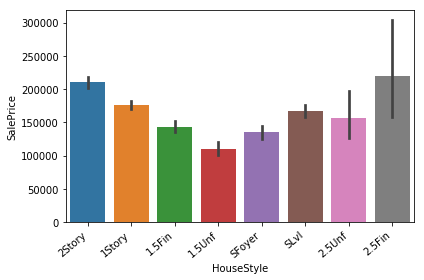

In [73]:
ap=sns.barplot(x='HouseStyle',y='SalePrice', data=df)
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [74]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

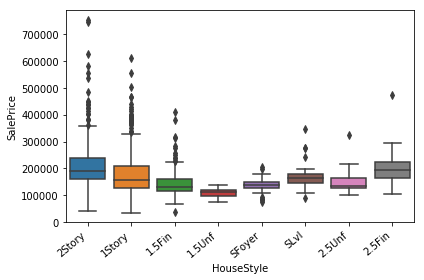

In [75]:
ap=sns.boxplot(x='HouseStyle',y='SalePrice', data=df)
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [76]:
df1= df.groupby('HouseStyle')['SalePrice'].apply(list).to_dict()
f, p= stats.f_oneway(df1['1.5Fin'],df1['1.5Unf'],df1['1Story'],df1['2.5Fin'],df1['2.5Unf'],df1['2Story'],df1['SFoyer'],df1['SLvl'])
f, p

(19.595000995981213, 3.376776535121222e-25)

In [77]:
dummy_House=pd.get_dummies(df['HouseStyle'])
df=pd.concat([df,dummy_House],axis=1)
dummy_House1=pd.get_dummies(main_test['HouseStyle'])
main_test=pd.concat([main_test,dummy_House1],axis=1)

In [78]:
main_test.shape

(1459, 109)

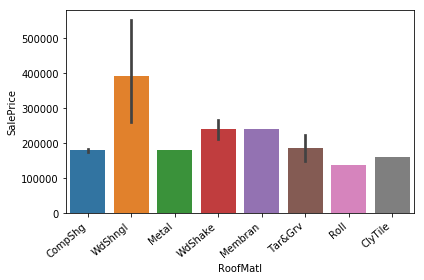

In [79]:
ap=sns.barplot(x='RoofMatl',y='SalePrice', data=df)
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [80]:
df2= df.groupby('RoofMatl')['SalePrice'].apply(list).to_dict()
f= stats.f_oneway(df2['CompShg'],df2['WdShngl'],df2['Metal'],df2['WdShake'],df2['Membran'],df2['Tar&Grv'],df2['Roll'],df2['ClyTile'])
f

F_onewayResult(statistic=6.727304893420313, pvalue=7.231444779987188e-08)

In [81]:
# mod = ols('HouseStyle ~ SalePrice', data=df).fit()
# anova=sm.stats.anova_lm(mod, typ=2)
# anova

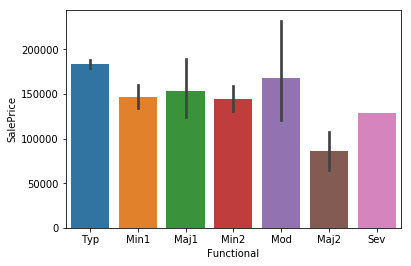

In [82]:
sns.barplot(x='Functional',y='SalePrice', data=df)

In [83]:
main_test.shape

(1459, 109)

In [84]:
dummy_Func=pd.get_dummies(df['Functional'])
df=pd.concat([df,dummy_Func],axis=1)
dummy_Func1=pd.get_dummies(main_test['Functional'])
main_test=pd.concat([main_test,dummy_Func1],axis=1)

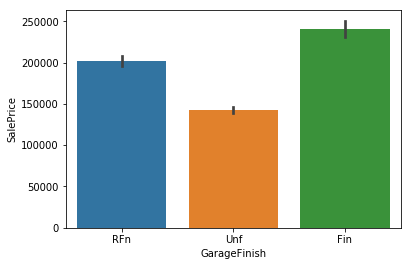

In [85]:
sns.barplot(x='GarageFinish',y='SalePrice', data=df)

In [86]:
main_test.shape

(1459, 116)

In [87]:
df["GarageFinish"] = df["GarageFinish"].map({np.nan: 0,"Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
main_test["GarageFinish"] = main_test["GarageFinish"].map({np.nan: 0,"Unf": 1, "RFn": 2, "Fin": 3}).astype(int)

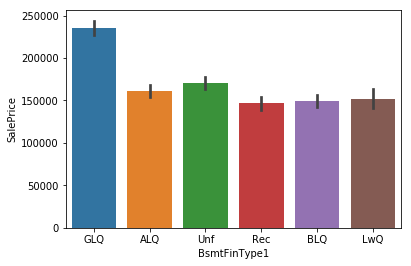

In [88]:
sns.barplot(x='BsmtFinType1',y='SalePrice', data=df)

In [89]:
df3= df.groupby('BsmtFinType1')['SalePrice'].apply(list).to_dict()
f= stats.f_oneway(df3['GLQ'],df3['ALQ'],df3['Unf'],df3['Rec'],df3['BLQ'],df3['LwQ'])
f

F_onewayResult(statistic=67.6021748362774, pvalue=1.8077310066862167e-63)

In [90]:
main_test.shape

(1459, 116)

In [91]:
dict2 = {np.nan: 0,"Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
df["BsmtFinType1"] = df["BsmtFinType1"].map(dict2).astype(int)
df["BsmtFinType2"] = df["BsmtFinType2"].map(dict2).astype(int)
main_test["BsmtFinType1"] = main_test["BsmtFinType1"].map(dict2).astype(int)
main_test["BsmtFinType2"] = main_test["BsmtFinType2"].map(dict2).astype(int)

In [92]:
main_test.shape

(1459, 116)

In [93]:
df['BsmtFinType'] = df[['BsmtFinType1','BsmtFinType2']].mean(axis=1)
main_test['BsmtFinType'] = main_test[['BsmtFinType1','BsmtFinType2']].mean(axis=1)

In [94]:
main_test.shape

(1459, 117)

In [95]:
dummy_Bsmt=pd.get_dummies(df['BsmtFinType'])
df=pd.concat([df,dummy_Bsmt],axis=1)
dummy_Bsmt1=pd.get_dummies(main_test['BsmtFinType'])
main_test=pd.concat([main_test,dummy_Bsmt1],axis=1)

In [96]:
main_test.shape

(1459, 128)

In [97]:
dummy_Bldg=pd.get_dummies(df['BldgType'])
df=pd.concat([df,dummy_Bldg],axis=1)
dummy_Bldg1=pd.get_dummies(main_test['BldgType'])
main_test=pd.concat([main_test,dummy_Bldg1],axis=1)

In [98]:
main_test.shape

(1459, 133)

In [99]:
dummy_MSZoning=pd.get_dummies(df['MSZoning'])
df=pd.concat([df,dummy_MSZoning],axis=1)
dummy_MSZoning1=pd.get_dummies(main_test['MSZoning'])
main_test=pd.concat([main_test,dummy_MSZoning1],axis=1)

In [100]:
main_test.shape

(1459, 138)

In [101]:
dummy_LotShape=pd.get_dummies(df['LotShape'])
df=pd.concat([df,dummy_LotShape],axis=1)
dummy_LotShape1=pd.get_dummies(main_test['LotShape'])
main_test=pd.concat([main_test,dummy_LotShape1],axis=1)

In [102]:
main_test.shape

(1459, 142)

In [103]:
dummy_LandContour=pd.get_dummies(df['LandContour'])
df=pd.concat([df,dummy_LandContour],axis=1)
dummy_LandContour1=pd.get_dummies(main_test['LandContour'])
main_test=pd.concat([main_test,dummy_LandContour1],axis=1)

In [104]:
main_test.shape

(1459, 146)

In [105]:
dummy_RoofStyle=pd.get_dummies(df['RoofStyle'])
df=pd.concat([df,dummy_RoofStyle],axis=1)
dummy_RoofStyle1=pd.get_dummies(main_test['RoofStyle'])
main_test=pd.concat([main_test,dummy_RoofStyle1],axis=1)

In [106]:
main_test.shape

(1459, 152)

In [107]:
dummy_Heating=pd.get_dummies(df['Heating'])
df=pd.concat([df,dummy_Heating],axis=1)
dummy_Heating1=pd.get_dummies(main_test['Heating'])
main_test=pd.concat([main_test,dummy_Heating1],axis=1)

In [108]:
main_test.shape

(1459, 156)

In [109]:
dummy_GarageType=pd.get_dummies(df['GarageType'])
df=pd.concat([df,dummy_GarageType],axis=1)
dummy_GarageType1=pd.get_dummies(main_test['GarageType'])
main_test=pd.concat([main_test,dummy_GarageType1],axis=1)

In [110]:
main_test.shape

(1459, 163)

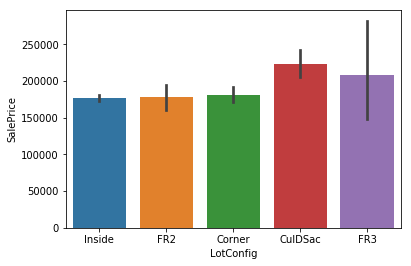

In [111]:
sns.barplot(x='LotConfig',y='SalePrice',data=df)

In [112]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [113]:
df4= df.groupby('LotConfig')['SalePrice'].apply(list).to_dict()
f= stats.f_oneway(df4['Inside'],df4['FR2'],df4['Corner'],df4['CulDSac'],df4['FR3'])
f

F_onewayResult(statistic=7.809954123467792, pvalue=3.163167473604189e-06)

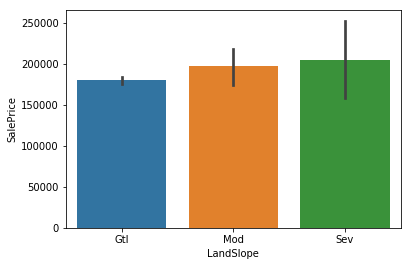

In [114]:
sns.barplot(x='LandSlope',y='SalePrice',data=df)

In [115]:
df['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [116]:
df5= df.groupby('LandSlope')['SalePrice'].apply(list).to_dict()
f= stats.f_oneway(df5['Gtl'],df5['Mod'],df5['Sev'])
f

F_onewayResult(statistic=1.9588170374149438, pvalue=0.1413963584114019)

In [117]:
main_test['Id'].shape

(1459,)

 Now lets map the ordinal variables 

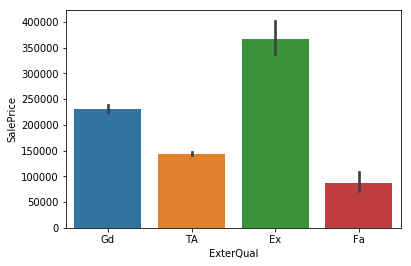

In [118]:
sns.barplot(x='ExterQual',y='SalePrice', data=df)

Price for ex is the highest which stands for excellent, followed by gd~good, then ta~average, then fa~Fair. But we need to encode these ordinal categorical columns. let me list the ordinal categorical columns that need encoding:ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond. For now i will encode and show what i want to infer for graph of only one column, because if do for all these columns now then sir will get confused and might miss out some of my diagrams and what they infer.   
    

In [119]:
dict1 = {np.nan: 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     df[i] = df[i].map(dict1).astype(int)
    

df["BsmtExposure"] = df["BsmtExposure"].map({np.nan: 0,"No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

In [120]:
dict1 = {np.nan: 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     main_test[i] = main_test[i].map(dict1).astype(int)
    

main_test["BsmtExposure"] = main_test["BsmtExposure"].map({np.nan: 0,"No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

In [121]:
df4= df.groupby('Electrical')['SalePrice'].apply(list).to_dict()
f= stats.f_oneway(df4['SBrkr'],df4['FuseF'],df4['FuseA'],df4['FuseP'],df4['Mix'])
f

F_onewayResult(statistic=23.06767302405713, pvalue=1.6632487814737638e-18)

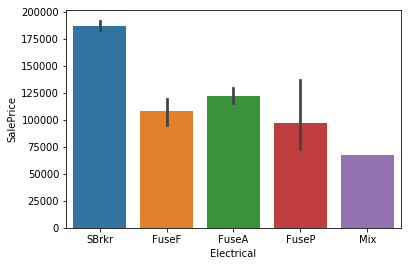

In [122]:
sns.barplot(x='Electrical',y='SalePrice', data=df)

In [123]:
df['Electrical'] =df['Electrical'].map({np.nan: 0,"Mix": 0, "FuseP": 1, "FuseF": 2, "FuseA": 3, "SBrkr": 4}).astype(int)
main_test['Electrical'] =main_test['Electrical'].map({np.nan: 0,"Mix": 0, "FuseP": 1, "FuseF": 2, "FuseA": 3, "SBrkr": 4}).astype(int)

 Lets take the average and create a new feature for bathing

In [124]:
df['BathAvg'] = df[['HalfBath','FullBath']].mean(axis=1)
main_test['BathAvg'] = main_test[['HalfBath','FullBath']].mean(axis=1)

In [125]:
df['BsmtBathAvg']=df[['BsmtHalfBath','BsmtFullBath']].mean(axis=1)
main_test['BsmtBathAvg']=main_test[['BsmtHalfBath','BsmtFullBath']].mean(axis=1)

 calculating total area using all area columns

In [126]:
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea']
df["TotalArea"] = df[area_cols].sum(axis=1)
df["TotalArea1st2nd"] = df["1stFlrSF"] + df["2ndFlrSF"]
main_test["TotalArea"] = main_test[area_cols].sum(axis=1)
main_test["TotalArea1st2nd"] = main_test["1stFlrSF"] + main_test["2ndFlrSF"]

In [127]:
df["Age"] = 2019 - df["YearBuilt"]
df["YearsSinceRemodel"] = df["YrSold"] - df["YearRemodAdd"]
main_test["Age"] = 2019 - main_test["YearBuilt"]
main_test["YearsSinceRemodel"] = main_test["YrSold"] - main_test["YearRemodAdd"]

 Did the modeling happen on the year it was sold?

In [128]:
df["RecentRemodel"] = (df["YearRemodAdd"] == df["YrSold"]) * 1
main_test["RecentRemodel"] = (main_test["YearRemodAdd"] == main_test["YrSold"]) * 1

 Was this house sold in the year it was built?

In [129]:
df["VeryNewHouse"] = (df["YearBuilt"] == df["YrSold"]) * 1
main_test["VeryNewHouse"] = (main_test["YearBuilt"] == main_test["YrSold"]) * 1

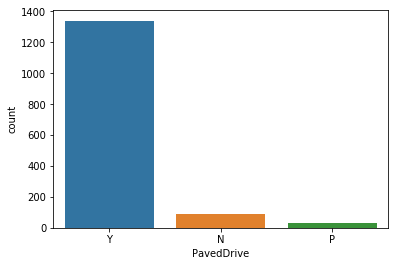

In [130]:
sns.countplot(x='PavedDrive', data=df)

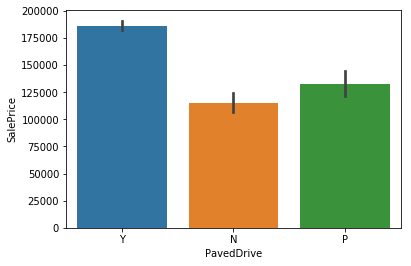

In [131]:
sns.barplot(y="SalePrice", x="PavedDrive", data=df)

 We see both count and price for y is high so lets make it 1 and rest as 0

In [132]:
df["IsPavedDrive"] = (df["PavedDrive"] == "Y") * 1
main_test["IsPavedDrive"] = (main_test["PavedDrive"] == "Y") * 1

 some more features on the basis of yes or no 

In [133]:
df["Has2ndFloor"] = (df["2ndFlrSF"] == 0) * 1
df["HasMasVnr"] = (df["MasVnrArea"] == 0) * 1
df["HasWoodDeck"] = (df["WoodDeckSF"] == 0) * 1
df["HasOpenPorch"] = (df["OpenPorchSF"] == 0) * 1
df["HasEnclosedPorch"] = (df["EnclosedPorch"] == 0) * 1
main_test["Has2ndFloor"] = (main_test["2ndFlrSF"] == 0) * 1
main_test["HasMasVnr"] = (main_test["MasVnrArea"] == 0) * 1
main_test["HasWoodDeck"] = (main_test["WoodDeckSF"] == 0) * 1
main_test["HasOpenPorch"] = (main_test["OpenPorchSF"] == 0) * 1
main_test["HasEnclosedPorch"] = (main_test["EnclosedPorch"] == 0) * 1

 setting levels with high count and price as 1 and the rest as 0

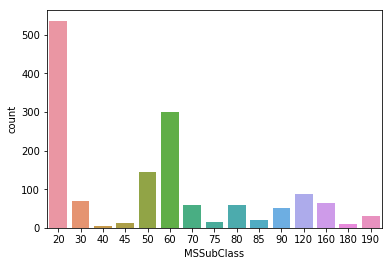

In [134]:
sns.countplot(x='MSSubClass', data=df)

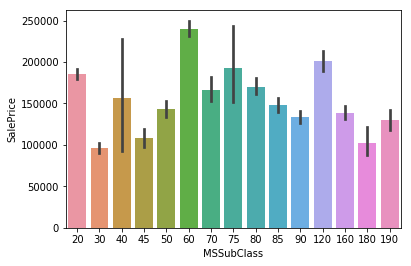

In [135]:
sns.barplot(y="SalePrice", x="MSSubClass", data=df)

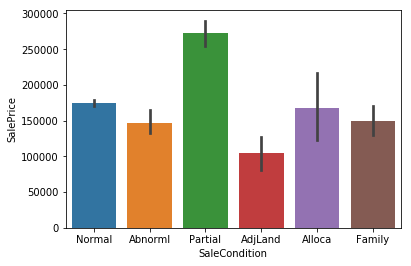

In [136]:
sns.barplot(y="SalePrice", x="SaleCondition", data=df)

In [137]:
df["SaleCondition"] = df.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})
main_test["SaleCondition"] = main_test.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

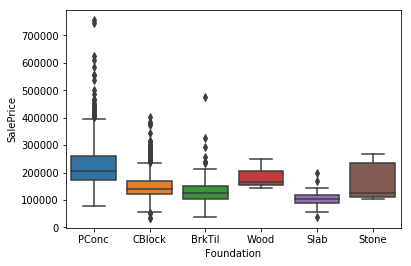

In [138]:
sns.boxplot(y="SalePrice", x="Foundation", data=df)

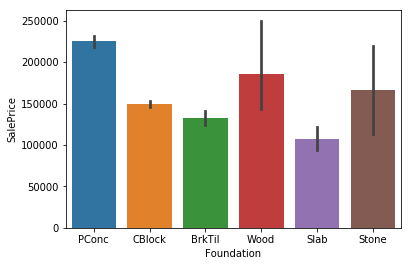

In [139]:
sns.barplot(y="SalePrice", x="Foundation", data=df)

In [140]:
Foundation_map={'PConc':1, 'CBlock':0, 'BrkTil':0, 'Wood':1, 'Slab':0, 'Stone':1}
df['Foundation']=df['Foundation'].map(Foundation_map)
main_test['Foundation']=main_test['Foundation'].map(Foundation_map)

In [141]:
df["NewerDwelling"] = df["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})
main_test["NewerDwelling"] = main_test["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

 Now lets see which columns are highly correlated with each other excluding output variables

In [142]:
cm = df.corr().abs()
tmp = cm['SalePrice']
i = tmp[tmp>0.5].index
new_cm = cm.loc[list(i),list(i)]

In [143]:
new_cm[new_cm>0.7]

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,...,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageArea,SalePrice,BathAvg,TotalArea1st2nd,Age,YearsSinceRemodel
Neighborhood,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,1.000000,NaN,NaN,0.726278,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.790982,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
YearRemodAdd,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99793
ExterQual,NaN,0.726278,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtQual,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.81953,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,0.81953,1.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,0.825489,NaN,NaN,NaN,NaN,0.708624,NaN,0.995718,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.779279,NaN,NaN,NaN


# (1stFlrSF,TotalBsmtSf) , (TotRmsAbvGrd,GrLivArea) , (GarageCars,GarageArea) are some highly corelated column pairs. So may be keeping only one of them may bring better performance

# So among the pairs we keep the columns that have highest corelation with the o/p variables.ie. TotalBsmtSF,GrLivArea,GarageCars. 

In [144]:
df.drop(df[['1stFlrSF','TotRmsAbvGrd','GarageCars']],axis=1,inplace=True)
main_test.drop(main_test[['1stFlrSF','TotRmsAbvGrd','GarageCars']],axis=1,inplace=True)

In [145]:
main_test['Id'].shape

(1459,)

In [146]:
def removeLowCorrCols(df):
    d=df[df.columns[1:]].corr().abs()['SalePrice'][:].to_dict()
    droplist = [col for col, corr in d.items() if corr < 0.1]
    print("Dropping",droplist)
    df.drop(droplist,axis=1,inplace=True)
    
removeLowCorrCols(df)

Dropping ['MSSubClass', 'Street', 'Utilities', 'OverallCond', 'ExterCond', 'BsmtFinType2', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'HdBoard', 'ImStucc', 'Plywood', 'Stone', 'Stucco', 'WdShing', 'Pos', 'Rail', 'COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Oth', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl', 'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 1.0, 1.5, 4.0, 4.5, 5.0, 5.5, '2fmCon', 'Twnhs', 'TwnhsE', 'FV', 'RH', 'IR3', 'Low', 'Lvl', 'Flat', 'Gambrel', 'Mansard', 'Shed', 'Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall', '2Types', 'Basment', 'CarPort']


In [147]:
main_test.drop(main_test[['MSSubClass', 'Street', 'Utilities', 'OverallCond', 'ExterCond', 'BsmtFinType2', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'HdBoard', 'Plywood', 'Stucco', 'WdShing', 'Pos', 'Rail', 'COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Oth', '1.5Unf', '1Story', '2.5Unf', 'SFoyer', 'SLvl', 'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 1.0, 1.5, 4.0, 4.5, 5.0, 5.5, '2fmCon', 'Twnhs', 'TwnhsE', 'FV', 'RH', 'IR3', 'Low', 'Lvl', 'Flat', 'Gambrel', 'Mansard', 'Shed', 'GasA', 'GasW', 'Grav',  'Wall', '2Types', 'Basment', 'CarPort']],axis=1,inplace=True)

# These features were too lowly correlated. During feature selection we shall choose the best features and prepare the final list of features then move to model building.

In [148]:
df.columns

Index([               'Id',          'MSZoning',       'LotFrontage',
                 'LotArea',          'LotShape',       'LandContour',
               'LotConfig',         'LandSlope',      'Neighborhood',
              'Condition1',
       ...
       'YearsSinceRemodel',     'RecentRemodel',      'VeryNewHouse',
            'IsPavedDrive',       'Has2ndFloor',         'HasMasVnr',
             'HasWoodDeck',      'HasOpenPorch',  'HasEnclosedPorch',
           'NewerDwelling'],
      dtype='object', length=109)

In [150]:
x_test=np.log(df['SalePrice'])

In [151]:
x_test.isnull().sum()

0

In [152]:
df.drop(df[['Id','Exterior1st','Exterior2nd','MSZoning','LotShape','Heating','GarageType','LotConfig','SalePrice', 'LandSlope','LandContour','RoofStyle', 'MasVnrType','MasVnrArea','Condition1','Condition2','BldgType','SaleType','HouseStyle','Functional','BsmtFinType1','HalfBath','FullBath','BsmtFullBath',"2ndFlrSF",'PavedDrive','RoofMatl']],axis=1,inplace=True)
main_test.drop(main_test[['Id','Exterior1st','Exterior2nd','MSZoning','LotShape','Heating','GarageType','LotConfig', 'LandSlope','LandContour','RoofStyle', 'MasVnrType','MasVnrArea','Condition1','Condition2','BldgType','SaleType','HouseStyle','Functional','BsmtFinType1','HalfBath','FullBath','BsmtFullBath',"2ndFlrSF",'PavedDrive','RoofMatl']],axis=1,inplace=True)

In [153]:
stop

NameError: name 'stop' is not defined

In [ ]:
# object_vars = list(main_test.select_dtypes(include=object).columns)
# object_vars

In [ ]:
# gdb = GradientBoostingRegressor()
# gdb.fit(df,x_test)

In [ ]:
# params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)], 'cv':[2,3,4,5], 'subsample':[i/10.0 for i in range(6,11)], 'learning_rate':[i/10.0 for i in range(1,6)],
# 'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4],'reg_alpha':[i/10.0 for i in range(3,6)],'reg_lambda':[i/10.0 for i in range(3,6)]}

In [ ]:
# xgb = xgb.XGBRegressor(nthread=-1) 

# grid = GridSearchCV(xgb, params)
# grid.fit(df, x_test)


In [ ]:
grid.best_params_

In [ ]:
stop

In [154]:
regr = xgb.XGBRegressor(colsample_bytree=0.8, 
                        gamma=0.3, learning_rate=0.05, 
                        max_depth=4, min_child_weight=4, 
                        n_estimators=7200, cv=3,
                        reg_alpha=0.9,
                        reg_lambda=0.6, 
                        subsample=0.7, 
                        seed=42,
                        silent=1)
regr.fit(df, x_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, cv=3, gamma=0.3,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=4, missing=None, n_estimators=7200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
       silent=1, subsample=0.7, verbosity=1)

In [ ]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
duplicate_columns = df.columns[df.columns.duplicated()]
duplicate_columns

In [ ]:
df.columns.size

In [ ]:
col1=x_test.columns
col2=df.columns

In [ ]:
NotList = set(col2) - set(col1)
NotList

In [ ]:
one_not_two = [ x for x in col1 if x not in col2 ]
one_not_two

In [ ]:
two_not_one = [ x for x in col2 if x not in col1 ]
two_not_one

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
x_test.shape

In [155]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))


y_pred = regr.predict(df)
y_test =x_test
print("XGBoost score on training set: ", rmse(y_test,y_pred))

XGBoost score on training set:  0.1166797745381659


In [ ]:
actual_pred = regr.predict(main_test)

In [ ]:
actual_pred.shape

In [ ]:
pred1 = pd.DataFrame({'Id': MainTestCopy['Id'], 'SalePrice': actual_pred})
pred1.to_csv('xgbn.csv', header=True, index=False)

In [ ]:
pred1.head()

In [ ]:
df.drop()